In [1]:
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [2]:
word_tokenize('hello world from dubai')

['hello', 'world', 'from', 'dubai']

In [3]:
TaggedDocument(word_tokenize('hello world from dubai'), [0])

TaggedDocument(words=['hello', 'world', 'from', 'dubai'], tags=[0])

In [4]:
def build_post_struct(lines):
    slug = next(line[len('slug:'):].strip() for line in lines[:10] if line.lower().startswith('slug:'))
    return {'slug': slug, 'contents': '\n'.join(lines[10:]).lower()}

BLOG_DIR = "d:/code/blog/content"
paths = [f'{BLOG_DIR}/{f}' for f in os.listdir(BLOG_DIR) if f.lower().endswith(".md")]
posts = [build_post_struct(open(path, encoding="utf8").read().splitlines()) for path in paths]
tagged_posts = {post['slug'] : TaggedDocument(word_tokenize(post['contents']), [idx]) for idx, post in enumerate(posts)}
idx_lookup = {idx : post['slug'] for idx, post in enumerate(posts)}
model = Doc2Vec(tagged_posts.values(), vector_size=100, alpha=0.025, min_count=1, workers=16, epochs=100)

In [5]:
def similar_posts(which, n=3):
    if not isinstance(which, str):
        which = idx_lookup[which]
    # at this point which is the slug
    if n == 'all':
        return model.dv.most_similar(positive=[model.infer_vector(tagged_posts[which][0])], topn=None)
    results = model.dv.most_similar(positive=[model.infer_vector(tagged_posts[which][0])], topn=n+1)
    results = [(idx_lookup[idx], score) for idx, score in results if idx != tagged_posts[which][1][0]]
    return results[:n]

In [6]:
similar_posts('investigating-information-storage-in-quantized-autoencoders-with-pytorch-and-mnist')

[('classification-accuracy-of-quantized-autoencoders-with-pytorch-and-mnist',
  0.8601593971252441),
 ('building-a-pytorch-autoencoder-for-mnist-digits', 0.6902680993080139),
 ('automatic-mlflow-logging-for-pytorch', 0.6199581623077393)]

In [7]:
similar_posts('python-decorator-patterns')

[('python-decorators-for-data-scientists', 0.6735740900039673),
 ('building-a-toy-python-dataclass-decorator', 0.6268576383590698),
 ('building-a-simple-python-enum-class', 0.6073521971702576)]

In [8]:
similar_posts('five-ways-to-reduce-variance-in-ab-testing')

[('ab-testing-and-the-historic-lift-paradox', 0.5738171935081482),
 ('aa-testing-and-false-positives-with-cuped', 0.5692949891090393),
 ('correlations-seasonality-lift-and-cuped', 0.5535995364189148)]

In [9]:
def plot_matrix(m):
    plt.imshow(m, cmap='YlOrRd', interpolation='nearest')
    plt.colorbar()
    plt.show()

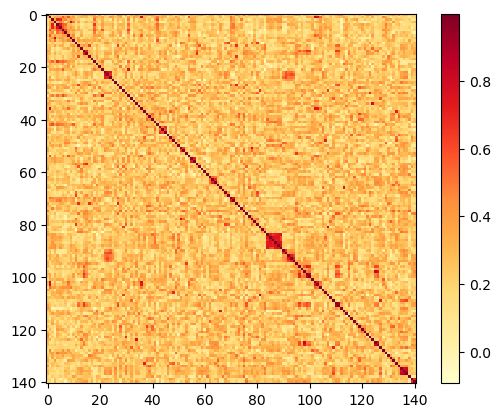

In [10]:
similarity_matrix = [similar_posts(idx, n='all') for idx in idx_lookup.keys()]
plot_matrix(similarity_matrix)